In [18]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima=pd.read_csv("diabetes.csv",header=None,names=col_names)
pima.head()
pima=pima.iloc[1:]
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(pima.dtypes)

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

pregnant    object
glucose     object
bp          object
skin        object
insulin     object
bmi         object
pedigree    object
age         object
label       object
dtype: object


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics #import scikit-learn metrics module for accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

Accuracy: 0.7575757575757576


array([[127,  19],
       [ 37,  48]])

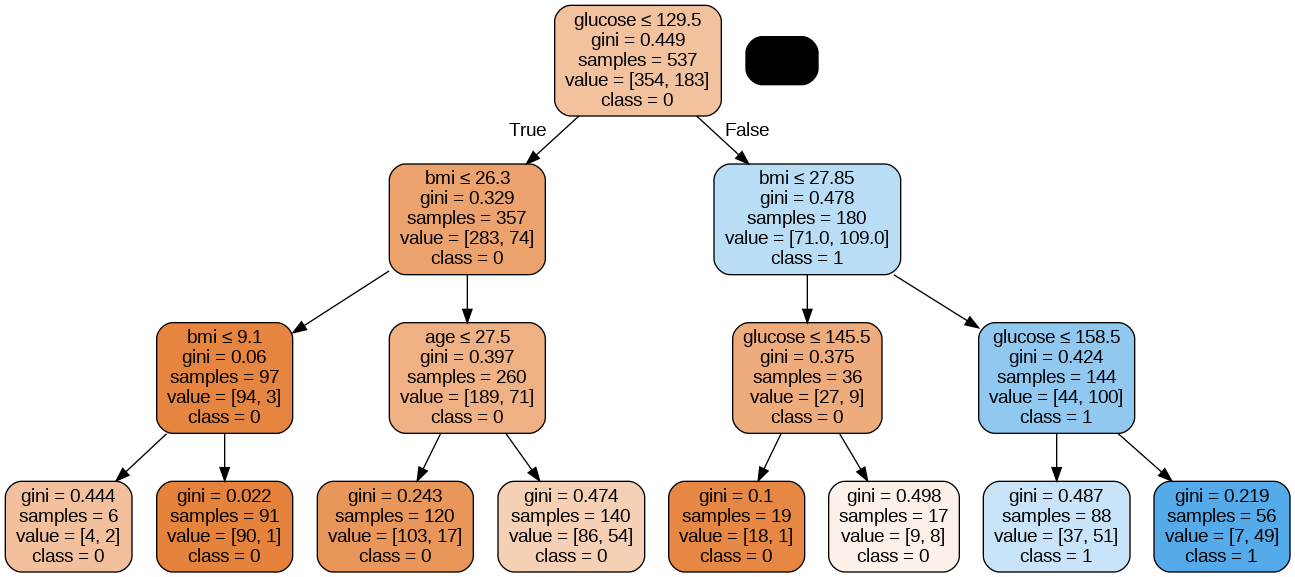

In [29]:

!pip install graphviz
!pip install pydotplus
!pip install scikit-learn

from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
graph.write_png('diabetes.png')
Image(graph.create_png())